# 降维是指降低特征的个数,主要有两种方法:  
1.特征选择  
2.主成分分析

## 1.特征选择  
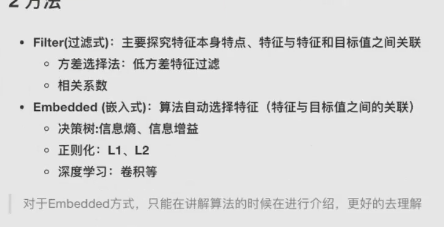

1)方差选择法  
如果某个特征的方法非常小,则意味着大部分的样本,该特征基本一样,对分类或预测没有太大的帮助,因此可以去掉  
2)相关系数  
相关系数大的两个特征,表明他们的作用重复,可以只取其中一个或平均等等,最好用PCA

### 1)方差选择法:  
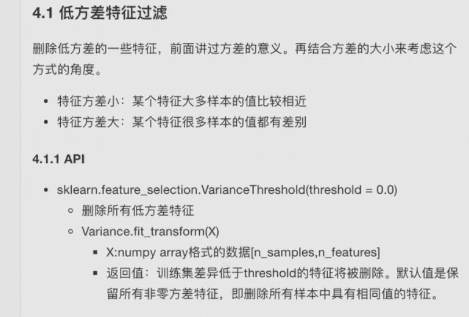

In [1]:
import pandas as pd

In [2]:
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('./data/factor_returns.csv')

In [4]:
data.head()

,index,pe_ratio,pb_ratio,market_cap,return_on_asset_net_profit,du_return_on_equity,ev,earnings_per_share,revenue,total_expense,date,return
0,000001.XSHE,5.9572,1.1818,8.525255e+10,0.8008,14.9403,1.211445e+12,2.010,2.070140e+10,1.088254e+10,2012-01-31,0.027657
1,000002.XSHE,7.0289,1.5880,8.411336e+10,1.6463,7.8656,3.002521e+11,0.326,2.930837e+10,2.378348e+10,2012-01-31,0.082352
2,000008.XSHE,-262.7461,7.0003,5.170455e+08,-0.5678,-0.5943,7.705178e+08,-0.006,1.167983e+07,1.203008e+07,2012-01-31,0.099789
3,000060.XSHE,16.4760,3.7146,1.968046e+10,5.6036,14.6170,2.800916e+10,0.350,9.189387e+09,7.935543e+09,2012-01-31,0.121595
4,000069.XSHE,12.5878,2.5616,4.172721e+10,2.8729,10.9097,8.124738e+10,0.271,8.951453e+09,7.091398e+09,2012-01-31,-0.002681


In [5]:
data = data.iloc[:,1:-2]

In [12]:
# 1.实例化一个转换器
transfer = VarianceThreshold(threshold=10)

# 2.调用fit_transform()
data_reduction = transfer.fit_transform(data)

In [13]:
data_reduction.shape

(2318, 7)

In [14]:
data.shape

(2318, 9)

### 2) 相关系数  
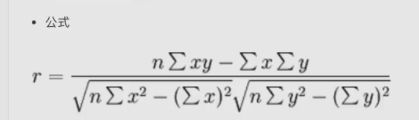

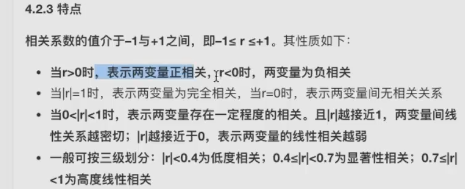

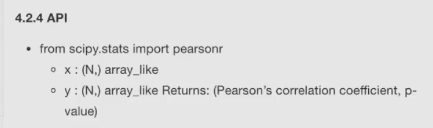

In [15]:
from scipy.stats import pearsonr

In [18]:
# 计算某两个变量之间的相关系数
r = pearsonr(data['pe_ratio'],data['pb_ratio'])

In [19]:
r[0] # 返回结果的第一个数就是相关系数

(-0.004389322779936274, 0.8327205496591377)

# 2.主成分分析

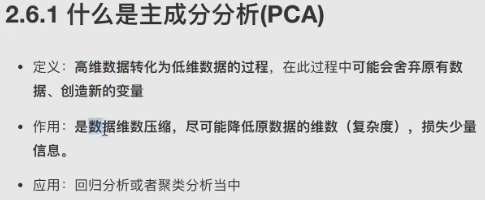

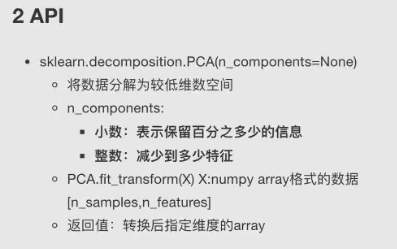

In [20]:
from sklearn.decomposition import PCA

In [29]:
# 1.实例化一个pca对象
transfer = PCA(n_components = 0.98)  # n_components传入的为整数时,表示保留几个特征,传入的为小数时,表明保留百分之多少的信息

# 2.调用fit_transform()
data_pca = transfer.fit_transform(data)

In [30]:
data_pca.shape

(2318, 2)

In [31]:
data.shape

(2318, 9)